This is from a Kaggle dataset which can be found in https://www.kaggle.com/kumarajarshi/life-expectancy-who
The dataset contains data from 2000 to 2015 for 193 countries and a description of each feature is shown below.
Our target feature will be Life Expectancy, which we aim to predict through use of a Machine Learning Model.

|Field|Description|
|---:|:---|
|Country|Country|
|Year|Year|
|Status|Developed or Developing status|
|Life expectancy|Life Expectancy in age|
|Adult Mortality|Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)|
|infant deaths|Number of Infant Deaths per 1000 population|
|Alcohol|Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)|
|percentage expenditure|Expenditure on health as a percene of Gross Domestic Product per capita(%)|
|Hepatitis B|Hepatitis B (HepB) immunization coverage among 1-year-olds (%)|
|Measles|Measles - number of reported cases per 1000 population|
|BMI|Average Body Mass Index of entire population|
|under-five deaths|Number of under-five deaths per 1000 population|
|Polio|Polio (Pol3) immunization coverage among 1-year-olds (%)|
|Total expenditure|General government expenditure on health as a percene of total government expenditure (%)|
|Diphtheria|Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)|
|HIV/AIDS|Deaths per 1 000 live births HIV/AIDS (0-4 years)|
|GDP|Gross Domestic Product per capita (in USD)|
|Population|Population of the country|
|thinness 1-19 years|Prevalence of thinness among children and adolescents for Age 10 to 19 (%)|
|thinness 5-9 years|Prevalence of thinness among children for Age 5 to 9(%)|
|Income composition of resources|Income composition of resources|
|Schooling|Number of years of Schooling(years)|

## Questions to answer

Does various predicting factors which have been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?

Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?

How does Infant and Adult mortality rates affect life expectancy?

Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.

What is the impact of schooling on the lifespan of humans?

Does Life Expectancy have positive or negative relationship with drinking alcohol?

What is the impact of Immunization coverage on life Expectancy?

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import (mean_absolute_error as mae, 
                            mean_squared_error as mse, 
                            median_absolute_error as median_eror)
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

pd.set_option("Display.Max_Columns", 22)

In [2]:
life = pd.read_csv('Life_data.csv')

In [3]:
life.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Some columns seem to have data that is very unreliable: 
- Percentage Expenditure should be a number between 0-100 but its mean is ~738 and its standard deviation is ~1987.
- BMI's mean is 38.32 which seems too high and its standard deviation is also too high, probably wrong overall.
- Population also seems unreliable due to a very high standard deviation. It's possible there were errors with separators during input.
- Infant Deaths and Under Five Deaths also have maximum values higher than its upper limit should be (since its per thousand)

We'll check NaNs and outliers before making further decisions

In [4]:
life.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
# Renaming columns so it's more readable
life.rename(columns={" BMI ":"BMI", "Life expectancy ":"Life_Exp", "Adult Mortality": "Adult_Mortality",
                    "infant deaths": "Infant_Deaths", "percentage expenditure":"Pctg_Exp", "Hepatitis B":"HepB",
                     'Measles ':'Measles',"under-five deaths ": "Under_Five_Deaths",' HIV/AIDS':'HIV/AIDS',
                     ' thinness  1-19 years': 'Thinness_10to19',' thinness 5-9 years':'Thinness_5to9',
                     'Diphtheria ':'Diphtheria','Income composition of resources': 'ICR'}, inplace=True)

In [6]:
# Out of curiosity, let's check differences between developed and developing countries overall
groupedStatus = life.groupby('Status').mean()
groupedStatus

# We can see noticeable differences but they may also be exarcebated because of outliers.

,Year,Life_Exp,Adult_Mortality,Infant_Deaths,Alcohol,Pctg_Exp,HepB,Measles,BMI,Under_Five_Deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_10to19,Thinness_5to9,ICR,Schooling
Status,,,,,,,,,,,,,,,,,,,,
Developed,2007.500000,79.197852,79.685547,1.494141,9.826736,2703.600380,88.041298,499.005859,51.803906,1.810547,93.736328,7.554042,93.476562,0.100000,22053.386446,6.830053e+06,1.320703,1.296680,0.852489,15.845474
Developing,2007.522671,67.111465,182.833195,36.384171,3.484119,323.470285,79.763930,2824.926216,35.435326,50.525144,80.170752,5.590694,79.951807,2.088664,4286.556053,1.407108e+07,5.592935,5.635242,0.582310,11.219256


## Data Cleaning and Exploratory Analysis

In [7]:
life.isnull().sum()*100/life.isnull().count()

Country               0.000000
Year                  0.000000
Status                0.000000
Life_Exp              0.340368
Adult_Mortality       0.340368
Infant_Deaths         0.000000
Alcohol               6.603131
Pctg_Exp              0.000000
HepB                 18.822328
Measles               0.000000
BMI                   1.157250
Under_Five_Deaths     0.000000
Polio                 0.646698
Total expenditure     7.692308
Diphtheria            0.646698
HIV/AIDS              0.000000
GDP                  15.248468
Population           22.191967
Thinness_10to19       1.157250
Thinness_5to9         1.157250
ICR                   5.684139
Schooling             5.547992
dtype: float64

'Hepatitis B' feature has a lot of NaN values probably because it's not proeminent in every country thus not
requiring vaccination everywhere.

'Population' and 'GDP' also have many null values.

In [8]:
groupedCountry = life.groupby('Country').mean()
groupedCountry.loc[groupedCountry['HepB'].isnull()]

# We can see all countries which have null values are developed ones. We'll treat this feature as if these countries had 
# 100% vaccination coverage since it's the same as the disease being erradicated.

,Year,Life_Exp,Adult_Mortality,Infant_Deaths,Alcohol,Pctg_Exp,HepB,Measles,BMI,Under_Five_Deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_10to19,Thinness_5to9,ICR,Schooling
Country,,,,,,,,,,,,,,,,,,,,
Denmark,2007.5,79.25625,66.0625,0.0000,10.708000,5313.335794,NaN,15.7500,55.82500,0.0000,88.0000,7.822667,88.0000,0.1,33067.407916,4.260081e+06,1.16250,0.93750,0.899875,17.19375
Finland,2007.5,80.71250,68.8750,0.0000,9.552667,2889.315470,NaN,2.8125,52.30000,0.0000,97.1875,8.614000,98.2500,0.1,25268.649758,3.493082e+06,0.90000,0.80625,0.872938,17.29375
Hungary,2007.5,73.82500,147.0625,0.5625,11.427333,376.831080,NaN,2.0625,56.93125,0.8750,98.9375,7.768667,99.0000,0.1,8513.641831,1.604902e+06,1.91875,1.91250,0.804312,15.11875
Iceland,2007.5,82.44375,49.3750,0.0000,7.466000,4991.595308,NaN,0.0000,51.07500,0.0000,89.7500,8.546000,89.7500,0.1,30159.502907,1.861776e+05,0.95625,0.90000,0.885313,18.15625
Japan,2007.5,82.53750,57.1250,2.8750,7.040667,3923.050329,NaN,6875.8125,25.60625,4.0000,96.0000,6.472667,96.2500,0.1,24892.544784,9.738406e+04,1.81250,1.54375,0.876563,14.97500
Norway,2007.5,81.79375,66.2500,0.0000,6.234375,4658.813918,NaN,6.3125,50.81250,0.0000,93.0625,9.086000,87.9375,0.1,27434.946928,2.614432e+06,0.76250,0.70000,0.931438,17.46875
Slovenia,2007.5,79.73125,76.4375,0.0000,10.754667,1556.334545,NaN,6.0625,52.20000,0.0000,95.1875,8.855333,95.0000,0.1,11441.044378,4.012791e+05,1.76875,1.79375,0.860437,16.47500
Switzerland,2007.5,82.33125,55.7500,0.0000,10.338000,9801.810377,NaN,397.5000,51.43750,0.0000,95.3750,6.087333,94.5625,0.1,57362.874601,5.913242e+06,0.53750,0.39375,0.911062,15.39375
United Kingdom of Great Britain and Northern Ireland,2007.5,80.79375,70.3750,3.6250,11.131250,0.000000,NaN,715.7500,55.38750,4.0625,92.8750,8.534000,92.8750,0.1,NaN,NaN,0.75000,0.50625,NaN,NaN


In [9]:
life['HepB'].fillna(100, inplace=True)

In [10]:
# BMI, Population, Pctg_Exp and Measles aren't reliable features at all, we're dropping them.
life.drop(['BMI','Population', 'Pctg_Exp','Measles'], axis=1, inplace=True)


In [11]:
# Instead of filling the NaNs with mean values for the whole dataset, we'll divide into Developed and Developing Countries.


m1 = (life['Status'] == 'Developed')
m2 = (life['Status'] == 'Developing')

columns_to_fill = ['Life_Exp','Alcohol','Adult_Mortality','Polio','Total expenditure','Diphtheria','GDP','Thinness_10to19',
                   'Thinness_5to9', 'ICR', 'Schooling']

for column in columns_to_fill:
    life.loc[m1, column] = life.loc[m1, column].fillna(life.loc[m1, column].mean())
    life.loc[m2, column] = life.loc[m2, column].fillna(life.loc[m2, column].mean())

In [12]:
life.isnull().sum()*100/life.isnull().count()

Country              0.0
Year                 0.0
Status               0.0
Life_Exp             0.0
Adult_Mortality      0.0
Infant_Deaths        0.0
Alcohol              0.0
HepB                 0.0
Under_Five_Deaths    0.0
Polio                0.0
Total expenditure    0.0
Diphtheria           0.0
HIV/AIDS             0.0
GDP                  0.0
Thinness_10to19      0.0
Thinness_5to9        0.0
ICR                  0.0
Schooling            0.0
dtype: float64

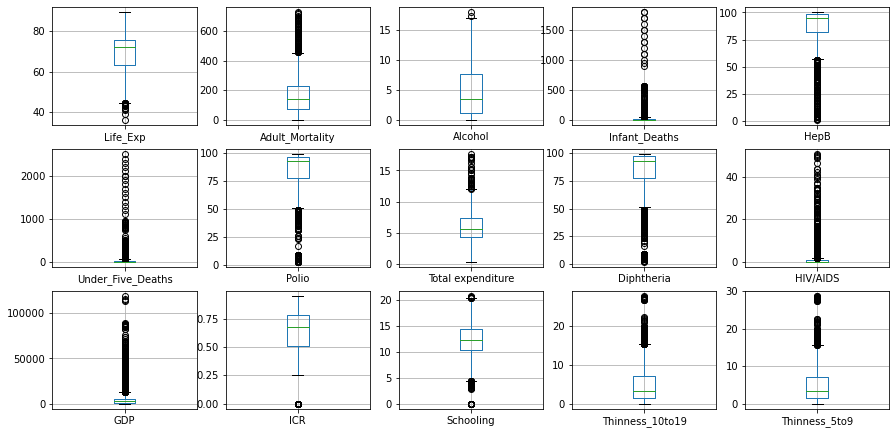

In [13]:
plt.figure(figsize=(15,10))
for i, col in enumerate(['Life_Exp', 'Adult_Mortality', 'Alcohol', 'Infant_Deaths', 
                        'HepB','Under_Five_Deaths','Polio','Total expenditure', 'Diphtheria','HIV/AIDS',
                         'GDP','ICR', 'Schooling', 'Thinness_10to19','Thinness_5to9'], start=1):
    plt.subplot(4,5,i)
    life.boxplot(col)

In [14]:
col_dict = {'Life_Exp':1, 'Adult_Mortality':2, 'Infant_Deaths':3, 'Alcohol':4, 'HepB':5,
           'Under_Five_Deaths': 6, 'Polio': 7, 'Total expenditure':8, 'Diphtheria': 9, 'HIV/AIDS': 10,
           'GDP': 11, 'Thinness_10to19': 12, 'Thinness_5to9': 13, 'ICR': 14, 'Schooling':15}

for variable in col_dict.keys():
    q75, q25 = np.percentile(life[variable], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(variable,
                                                                             len((np.where((life[variable] > max_val) | 
                                                                                           (life[variable] < min_val))[0])),len((np.where((life[variable] > max_val) | 
                                                                                           (life[variable] < min_val))[0]))*100/(life.shape[0])))
    print("Min and Max Outlier Thresholds for {} : {} and {}". format(variable, min_val, max_val))

Number of outliers and percentage of it in Life_Exp : 17 and 0.5786249149081008
Min and Max Outlier Thresholds for Life_Exp : 44.600000000000016 and 94.19999999999999
Number of outliers and percentage of it in Adult_Mortality : 86 and 2.92716133424098
Min and Max Outlier Thresholds for Adult_Mortality : -155.5 and 456.5
Number of outliers and percentage of it in Infant_Deaths : 315 and 10.721579305650103
Min and Max Outlier Thresholds for Infant_Deaths : -33.0 and 55.0
Number of outliers and percentage of it in Alcohol : 2 and 0.06807351940095303
Min and Max Outlier Thresholds for Alcohol : -8.623750000000001 and 17.286250000000003
Number of outliers and percentage of it in HepB : 305 and 10.381211708645337
Min and Max Outlier Thresholds for HepB : 56.5 and 124.5
Number of outliers and percentage of it in Under_Five_Deaths : 394 and 13.410483321987746
Min and Max Outlier Thresholds for Under_Five_Deaths : -42.0 and 70.0
Number of outliers and percentage of it in Polio : 279 and 9.49625

In [15]:
for variable in col_dict.keys():
    q75, q25 = np.percentile(life[variable], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Min and Max Outlier Thresholds for {} : {} and {}". format(variable, min_val, max_val))

Min and Max Outlier Thresholds for Life_Exp : 44.600000000000016 and 94.19999999999999
Min and Max Outlier Thresholds for Adult_Mortality : -155.5 and 456.5
Min and Max Outlier Thresholds for Infant_Deaths : -33.0 and 55.0
Min and Max Outlier Thresholds for Alcohol : -8.623750000000001 and 17.286250000000003
Min and Max Outlier Thresholds for HepB : 56.5 and 124.5
Min and Max Outlier Thresholds for Under_Five_Deaths : -42.0 and 70.0
Min and Max Outlier Thresholds for Polio : 49.5 and 125.5
Min and Max Outlier Thresholds for Total expenditure : -0.21999999999999975 and 12.02
Min and Max Outlier Thresholds for Diphtheria : 49.5 and 125.5
Min and Max Outlier Thresholds for HIV/AIDS : -0.9500000000000001 and 1.85
Min and Max Outlier Thresholds for GDP : -6698.817186249999 and 12712.66063175
Min and Max Outlier Thresholds for Thinness_10to19 : -6.65 and 15.35
Min and Max Outlier Thresholds for Thinness_5to9 : -6.799999999999999 and 15.599999999999998
Min and Max Outlier Thresholds for ICR :

In [16]:
life.describe()

,Year,Life_Exp,Adult_Mortality,Infant_Deaths,Alcohol,HepB,Under_Five_Deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Thinness_10to19,Thinness_5to9,ICR,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.217738,164.857839,30.303948,4.589436,84.527910,42.035739,82.534801,5.932843,82.308742,1.742103,7382.749777,4.848421,4.879169,0.629394,12.025459
std,4.613841,9.508437,124.084750,117.926501,3.958286,23.784243,160.445548,23.352922,2.407843,23.640838,5.077785,13361.417098,4.395274,4.483454,0.207021,3.304714
min,2000.000000,36.300000,1.000000,0.000000,0.010000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,82.000000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,3.484119,95.000000,4.000000,93.000000,5.600000,93.000000,0.100000,3116.561755,3.400000,3.400000,0.672000,12.300000
75%,2012.000000,75.600000,227.000000,22.000000,7.570000,99.000000,28.000000,97.000000,7.430000,97.000000,0.800000,5433.356450,7.100000,7.200000,0.780000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,100.000000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,27.700000,28.600000,0.948000,20.700000


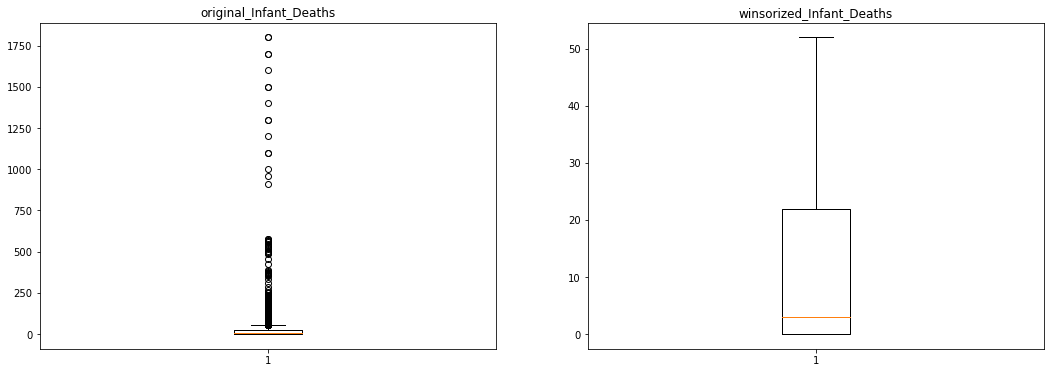

In [17]:
# Our goal is to remove outliers only from features which most likely had input errors rather than actual outliers.
# Features 'Infant_Deaths' and 'Under_Five_Deaths' all show numbers higher than 1000, which should be impossible.
# We'll use winsorization for these two.

from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Infant_Deaths = life['Infant_Deaths']
plt.boxplot(original_Infant_Deaths)
plt.title("original_Infant_Deaths")

plt.subplot(1,2,2)
winsorized_Infant_Deaths = winsorize(life['Infant_Deaths'],(0,0.12))
plt.boxplot(winsorized_Infant_Deaths)
plt.title("winsorized_Infant_Deaths")

plt.show()

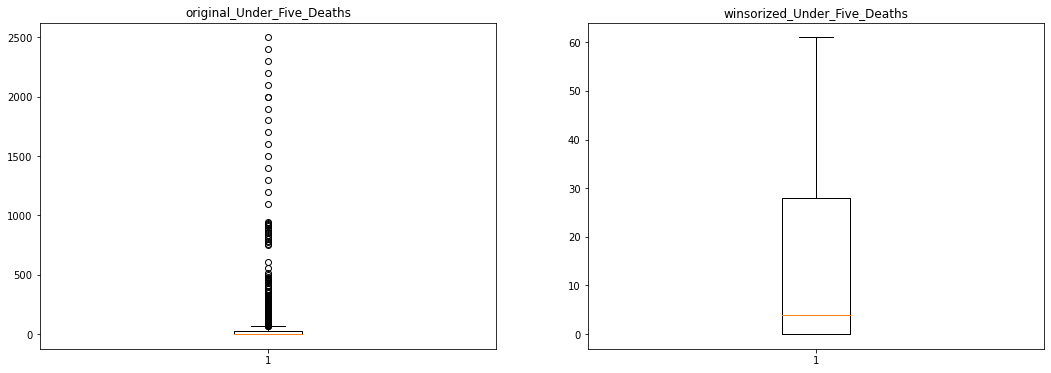

In [18]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Under_Five_Deaths = life['Under_Five_Deaths']
plt.boxplot(original_Under_Five_Deaths)
plt.title("original_Under_Five_Deaths")

plt.subplot(1,2,2)
winsorized_Under_Five_Deaths = winsorize(life['Under_Five_Deaths'],(0,0.15))
plt.boxplot(winsorized_Under_Five_Deaths)
plt.title("winsorized_Under_Five_Deaths")

plt.show()

In [19]:
life['winsorized_Infant_Deaths'] = winsorized_Infant_Deaths
life.drop('Infant_Deaths', axis=1, inplace=True)

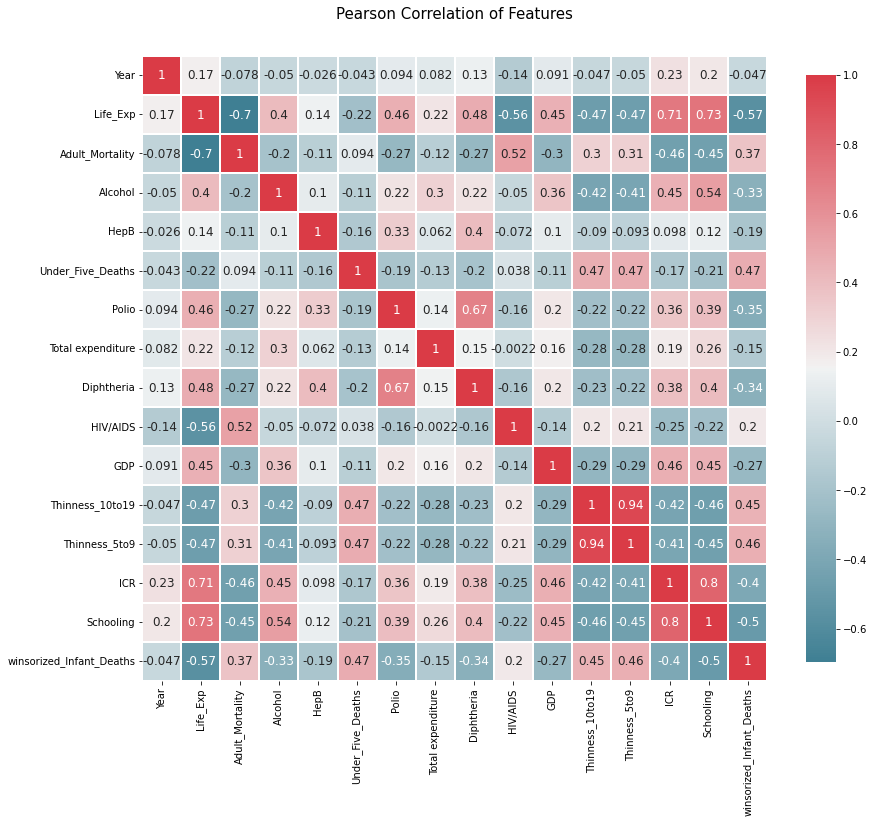

In [20]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    
correlation_heatmap(life)


In [21]:

life.drop('Under_Five_Deaths', axis=1, inplace=True)


Does various predicting factors which have been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?

By plotting the correlation matrix we're able to tell which features seem to have a higher influence in determining life expectancy and we can also check their relationship to one another.
Features such as Adult Mortality and HIV/AIDS deaths had a really big impact lowering life expectancy overall, which was somewhat expected.

ICR and Schooling were shown to have the biggest positive impact, increasing life expectancy more than other feeatures.

## Life Expectancy

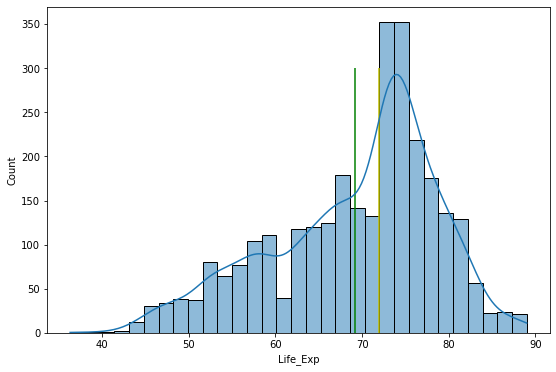

In [22]:
f, ax = plt.subplots(figsize=(9,6))
sns.histplot(data=life, x='Life_Exp', kde=True, ax=ax)
plt.vlines(x=life['Life_Exp'].mean(), ymin=0, ymax=300,color='g',
          label=f"Mean = {life['Life_Exp'].mean():.2f} ")
plt.vlines(x=life['Life_Exp'].median(),ymin=0, ymax=300, color='y')

In [23]:
def plot_num(df, col1, col2 = 'Life_Exp',kind='scatter', xlim=None):
    
    g = sns.jointplot(data=df, x=col1, y=col2,kind=kind, height=8, ratio=2,
                     xlim=xlim, ax=ax)

Let's start by finding out how Life expectancy has changed throughout the years. We'd also like to tell whether being a developed or a developing country influences these rates.

## Year

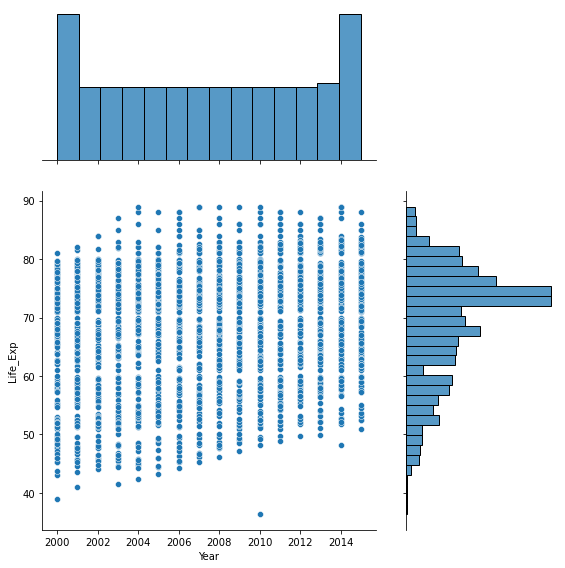

In [24]:
plot_num(life, 'Year', kind='scatter') 

How does Infant and Adult mortality rates affect life expectancy? 

## Adult Mortality

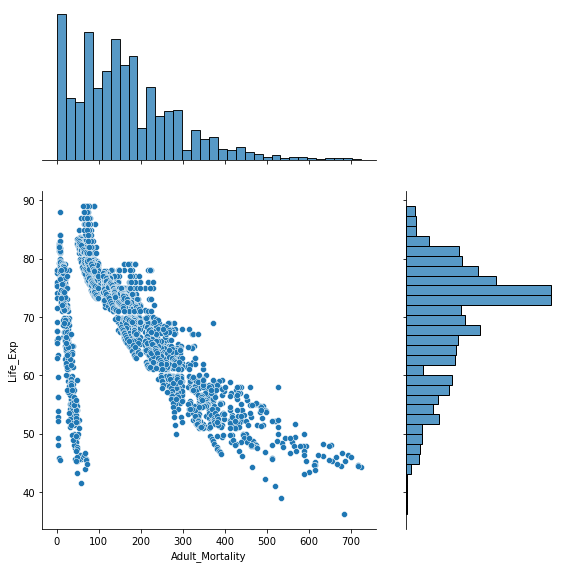

In [25]:
plot_num(life, 'Adult_Mortality', kind='scatter')

## Infant Deaths

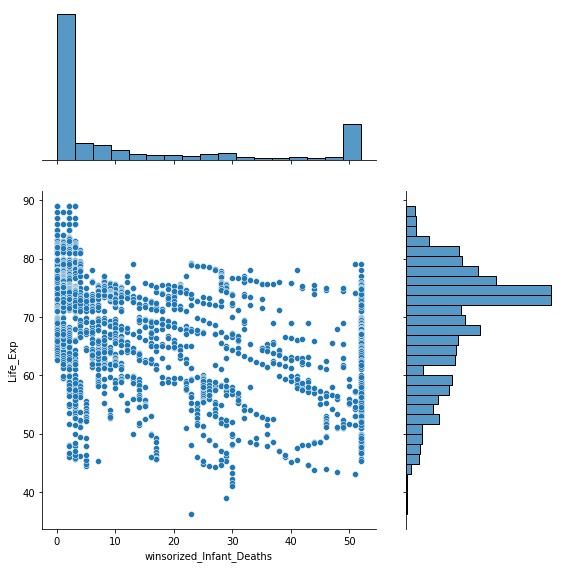

In [26]:
plot_num(life, 'winsorized_Infant_Deaths', kind='scatter')

Adult mortality defines the probability of someone dying between the ages of 15 and 60, so we already expected it to be one of the most important features.

Infant deaths don't seem relevant for countries with a life expecntacy over 80 y.o. For developing countries it's still an issue to overcome. 



Does Life Expectancy have positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol, etc.?

## Alcohol Consumption

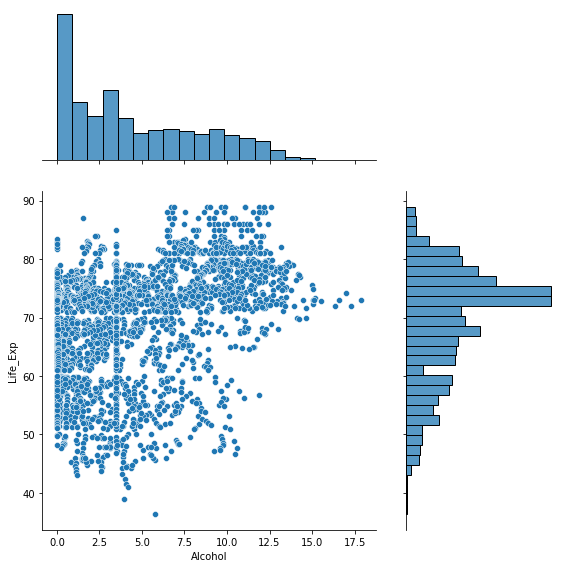

In [27]:
plot_num(life, 'Alcohol', kind='scatter')

Most likely there are other factors which influence alcohol consumption and life expectancy separately (such as GDP per capita and healtcare), but this is an interesting result for sure.

Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?

We can see there's a timid trend towards individual expenditure increasing life expectancy, but maybe government investment would have a bigger impact, so we'll check it aswell.

## Total Governemt Expenditure

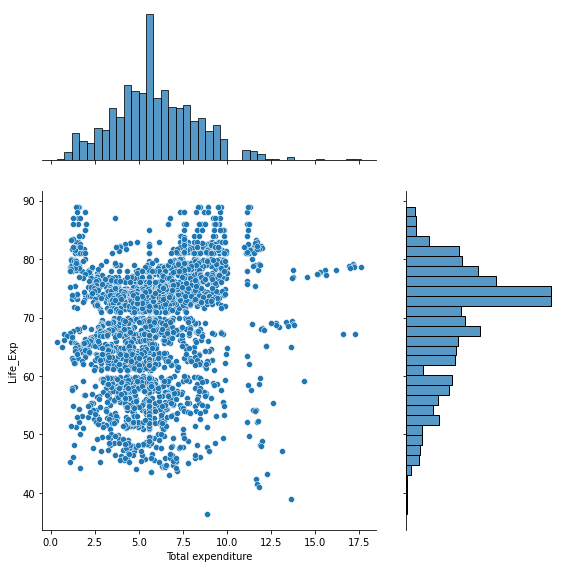

In [28]:
plot_num(life,'Total expenditure', kind='scatter')

Certainly other factors come into play here and while developed countries do tend to have higher health expenses it's not unanimous amongst them. We can also notice countries with very low government expenditure and a higher life expectancy probably due to different policies within each country.

What is the impact of schooling on the lifespan of humans?

## Schooling

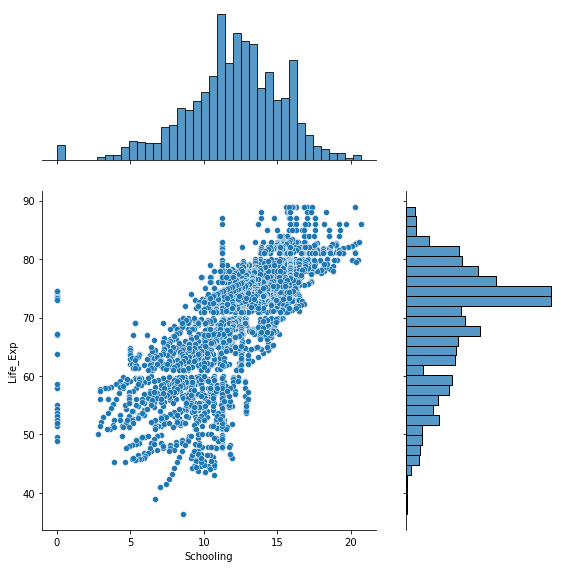

In [29]:
plot_num(life,'Schooling', kind='scatter')

With the exception of a few outliers there's a clear linear relationship between amount of years in school and life expectancy.

What is the impact of Immunization coverage on life Expectancy?

## Polio Vaccionation

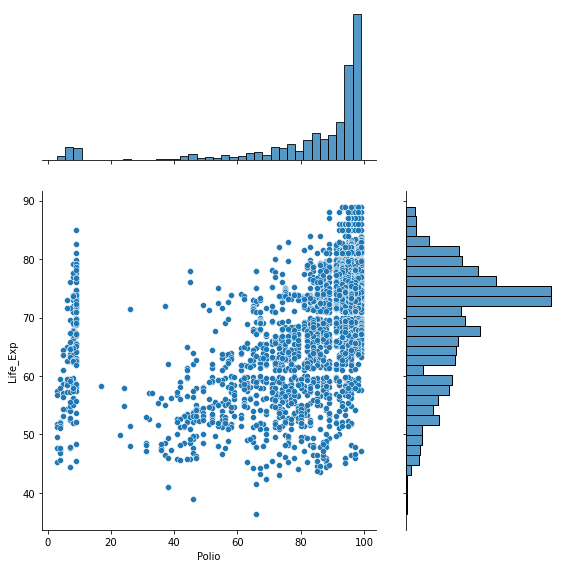

In [30]:
plot_num(life,'Polio', kind='scatter')

## Diphtheria Immunization

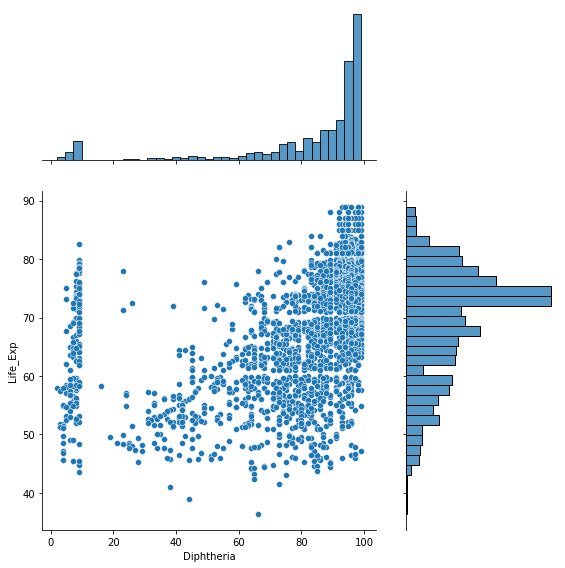

In [31]:
plot_num(life,'Diphtheria', kind='scatter')

In countries where these diseases are a public health issue we can see a positive relationship between Immunization
percentage and life expectancy

## HIV/AIDS deaths per 1000 live births

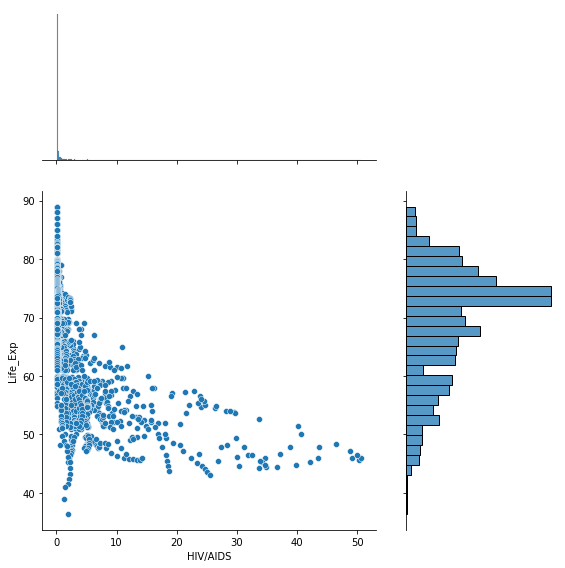

In [32]:
plot_num(life,'HIV/AIDS', kind='scatter')

In [33]:
life['Status'] = life['Status'].map({"Developed":1, "Developing":0})
life['Status'].value_counts()

0    2426
1     512
Name: Status, dtype: int64

## Machine Learning Modeling

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import (mean_absolute_error as mae, 
                            mean_squared_error as mse, 
                            median_absolute_error as median_eror)

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [35]:
Y = life['Life_Exp']
X = life.drop(['Country','Life_Exp'], axis=1)

In [36]:
cat_cols = ['Status']
num_cols = [x for x in X.columns if x not in cat_cols]

numeric_transformer = Pipeline(steps=[("scaler", MinMaxScaler())])

preprocessor = ColumnTransformer(transformers=[("num", numeric_transformer, num_cols)],
                                              remainder='passthrough')

def ml_model(x, y, preprocess_object, model, parameters_to_try=None):
    
    model_pipe = Pipeline(steps=[("transformer", preprocess_object),
                                ("regressor", model)])
    
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
    
    if parameters_to_try:
        randomsearch = RandomizedSearchCV(estimator=model_pipe,
                                        param_distributions=parameters_to_try,
                                        n_iter=50,
                                        n_jobs=-1,
                                        cv=10,
                                        random_state=42
                                        )
        randomsearch.fit(X_train,y_train)
        
        return randomsearch, X_test, y_test
    else:
        model_pipe.fit(X_train, y_train)
        return model_pipe, X_test, y_test

## Linear Regression

In [37]:
linearmodel, X_test, y_test = ml_model(X, Y, preprocessor, LinearRegression())

In [38]:
print(f"""
The scores for linear regression are:
R2: {linearmodel.score(X_test, y_test):.2f}
Mean absolute error: {mae(y_test, linearmodel.predict(X_test)):.2f}
Mean squared error: {mse(y_test, linearmodel.predict(X_test)):.2f}
Median absolute error: {median_eror(y_test, linearmodel.predict(X_test)):.2f}
""")


The scores for linear regression are:
R2: 0.82
Mean absolute error: 3.02
Mean squared error: 16.36
Median absolute error: 2.26



## RandomForest Regressor

In [39]:
params = {
    'regressor__n_estimators':[50,100, 150],
    'regressor__max_depth':[None,5,8,10, 12],
    'regressor__min_samples_split':[2,5,10, 15],
    'regressor__min_samples_leaf':[1,3,8,10,12],
}

rf, X_test, y_test = ml_model(X, Y, preprocessor, RandomForestRegressor(n_jobs=-1, random_state=42), params)

In [40]:
print(f"""
The scores for Random Forest Regression are:
R2: {rf.score(X_test, y_test):.2f}
Mean absolute error: {mae(y_test, rf.predict(X_test)):.2f}
Mean squared error: {mse(y_test, rf.predict(X_test)):.2f}
Median absolute error: {median_eror(y_test, rf.predict(X_test)):.2f}
""")


The scores for linear regression are:
R2: 0.96
Mean absolute error: 1.16
Mean squared error: 3.64
Median absolute error: 0.61



## GradientBoosting Regressor

In [41]:
params = {
    'regressor__n_estimators':[50,100, 150],
    'regressor__subsample':[1,0.8],
    'regressor__min_samples_split':[2,5,10, 15],
    'regressor__min_samples_leaf':[1,3,8,10,12],
    'regressor__max_depth':[3,5,6,8,10],
    'regressor__alpha':[0.9,0.8,0.95]
}
#creating and training model
gb, X_test, y_test = ml_model(X, Y, preprocessor, GradientBoostingRegressor(random_state=42), params)

In [42]:
print(f"""
The scores for XGB are:
Best score in training data: {gb.best_score_:.2f}
R2: {gb.score(X_test, y_test):.2f}
Mean absolute error: {mae(y_test, gb.predict(X_test)):.2f}
Mean squared error: {mse(y_test, gb.predict(X_test)):.2f}
Median absolute error: {median_eror(y_test, gb.predict(X_test)):.2f}

The best parameters are:{gb.best_params_}""")




The scores for linear regression are:
Best score in training data: 0.97
R2: 0.96
Mean absolute error: 1.11
Mean squared error: 3.33
Median absolute error: 0.57

The best parameters are:{'regressor__subsample': 0.8, 'regressor__n_estimators': 100, 'regressor__min_samples_split': 10, 'regressor__min_samples_leaf': 3, 'regressor__max_depth': 10, 'regressor__alpha': 0.95}


Through our modeling we were able to achieve an R2 score of 0.96 for both Random Forest and Gradient Boosting Regressors.

It's important to note that even though we got good results, this project was mainly a means of testing my data cleaning, exploratory analysis and machine learning modeling skills, so there's definitely room for improvement all throughout.
